# Portfolio

In [1]:
import pandas as pd
import numpy as np

import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

In [25]:
from jupyterthemes import jtplot
jtplot.style(figsize=(15, 9))

In [3]:
tickers  = ['AMD', 'AMZN', 'BAC', 'META']
amounts  = [20, 10, 30, 10]

In [4]:
portfolio = {
    'AMD': {
                'amount': 20,
                'date': dt.datetime(2023, 9, 30)
           },
    'AMZN': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
    'BAC': {
                'amount': 30,
                'date': dt.datetime(2023, 9, 30)
           },
    'META': {
                'amount': 10,
                'date': dt.datetime(2023, 9, 30)
           },
}

In [34]:
dl = []
for ticker in list(portfolio.items()):
    print(ticker[0], ticker[1]['date'])
    dl.append(
        [ticker[0],
        yf.download(ticker[0], ticker[1]['date'], dt.datetime.now(), auto_adjust=True)]
    )
dl

AMD 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
AMZN 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
BAC 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed
META 2023-09-30 00:00:00
[*********************100%***********************]  1 of 1 completed


[['AMD',                   Open        High         Low       Close     Volume
  Date                                                                 
  2023-10-02  102.209999  103.709999  101.699997  103.269997   45118600
  2023-10-03  101.800003  103.290001   99.169998  100.080002   48117000
  2023-10-04  100.650002  104.400002  100.339996  104.070000   51023200
  2023-10-05  103.410004  103.739998  100.269997  102.910004   51789700
  2023-10-06  102.160004  107.870003  102.029999  107.239998   64807500
  2023-10-09  106.010002  107.309998  104.790001  106.970001   39593200
  2023-10-10  107.489998  110.120003  106.400002  109.010002   57105500
  2023-10-11  109.139999  110.099998  106.930000  108.309998   51085600
  2023-10-12  108.400002  111.309998  107.510002  108.790001   60959400
  2023-10-13  108.650002  108.970001  104.750000  105.089996   52881500
  2023-10-16  105.419998  107.480003  105.029999  106.459999   42464500
  2023-10-17  103.540001  106.290001  101.660004  105.139

In [47]:
df = yf.download(list(portfolio.keys()), dt.datetime(2023, 1, 1), dt.datetime.now(), auto_adjust=True)
df

[*********************100%***********************]  4 of 4 completed


Close                                           High  \
                   AMD        AMZN        BAC        META         AMD   
Date                                                                    
2023-01-03   64.019997   85.820000  32.498127  124.739998   66.879997   
2023-01-04   64.660004   85.139999  33.109100  127.370003   65.790001   
2023-01-05   62.330002   83.120003  33.041222  126.940002   64.349998   
2023-01-06   63.959999   86.080002  33.370953  130.020004   64.300003   
2023-01-09   67.239998   87.360001  32.866650  129.470001   69.320000   
...                ...         ...        ...         ...         ...   
2023-11-27  122.650002  147.729996  29.325937  334.700012  123.889999   
2023-11-28  122.010002  147.029999  29.296177  338.989990  122.540001   
2023-11-29  123.849998  146.320007  30.070000  332.200012  125.730003   
2023-11-30  121.160004  146.089996  30.490000  327.149994  124.050003   
2023-12-01  121.080002  147.009995  31.004999  323.634613  121.289902   

                                                      Low              \
                  AMZN        BAC        META         AMD        AMZN   
Date                                                                    
2023-01-03   86.959999  33.060615  126.370003   63.590000   84.209999   
2023-01-04   86.980003  33.768567  129.050003   63.310001   83.360001   
2023-01-05   85.419998  33.109108  128.520004   62.299999   83.070000   
2023-01-06   86.400002  33.535821  130.330002   60.049999   81.430000   
2023-01-09   89.480003  33.710378  132.949997   65.669998   87.080002   
...                ...        ...         ...         ...         ...   
2023-11-27  149.259995  29.454909  339.899994  121.769997  146.880005   
2023-11-28  147.600006  29.415226  339.380005  120.790001  145.529999   
2023-11-29  148.539993  30.367625  339.899994  123.480003  145.970001   
2023-11-30  146.929993  30.549999  333.500000  119.650002  144.330002   
2023-12-01  147.039993  31.020000  326.859985  118.650002  145.570007   

                                         Open                         \
                  BAC        META         AMD        AMZN        BAC   
Date                                                                   
2023-01-03  32.207187  122.279999   66.000000   85.459999  32.226583   
2023-01-04  32.808464  125.849998   65.000000   86.550003  32.876350   
2023-01-05  32.566020  124.540001   64.150002   85.330002  32.895750   
2023-01-06  32.527224  126.040001   63.150002   83.029999  33.060616   
2023-01-09  32.692085  129.279999   66.220001   87.459999  33.700681   
...               ...         ...         ...         ...        ...   
2023-11-27  29.276334  334.200012  122.070000  147.529999  29.365621   
2023-11-28  29.087839  333.399994  121.980003  146.979996  29.296177   
2023-11-29  29.573959  330.779999  123.980003  147.850006  29.643404   
2023-11-30  30.040001  322.399994  123.610001  144.759995  30.209999   
2023-12-01  30.350000  320.760010  119.879997  146.000000  30.400000   

                          Volume                                
                  META       AMD      AMZN       BAC      META  
Date                                                            
2023-01-03  122.820000  46851800  76706000  35221500  35528500  
2023-01-04  127.379997  47477100  68885100  41998500  32397100  
2023-01-05  126.129997  46159500  67930800  34177000  25447100  
2023-01-06  128.970001  70161300  83303400  34068700  27584500  
2023-01-09  131.160004  69741300  65266100  43818800  26649100  
...                ...       ...       ...       ...       ...  
2023-11-27  336.179993  32743000  53762400  42039500  15684500  
2023-11-28  333.399994  32047100  42711700  29705800  12637200  
2023-11-29  339.690002  37876300  40610900  57954900  16024500  
2023-11-30  331.890015  44460900  65757400  52271100  23136300  
2023-12-01  325.480011  22849031  19594995  19089776   7550461  

[231 rows x 20 columns]

In [48]:
prices = df['Close']

In [49]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998
2023-01-04,64.660004,85.139999,33.109100,127.370003
2023-01-05,62.330002,83.120003,33.041222,126.940002
2023-01-06,63.959999,86.080002,33.370953,130.020004
2023-01-09,67.239998,87.360001,32.866650,129.470001
...,...,...,...,...
2023-11-27,122.650002,147.729996,29.325937,334.700012
2023-11-28,122.010002,147.029999,29.296177,338.989990
2023-11-29,123.849998,146.320007,30.070000,332.200012


In [39]:
total = []
for t, am in zip(tickers, amounts):
    total.append(prices[t][-1] * am)

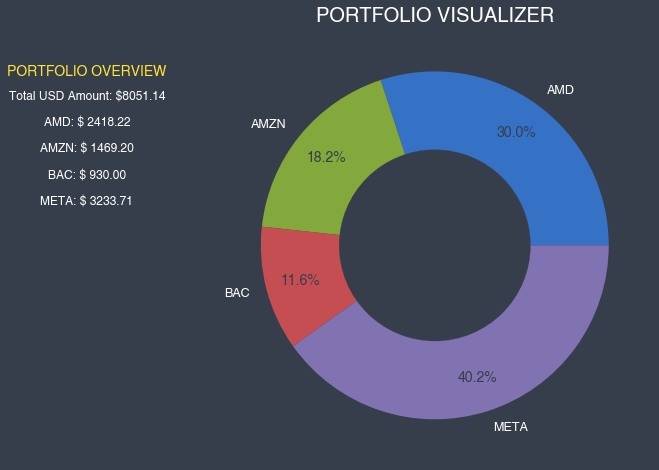

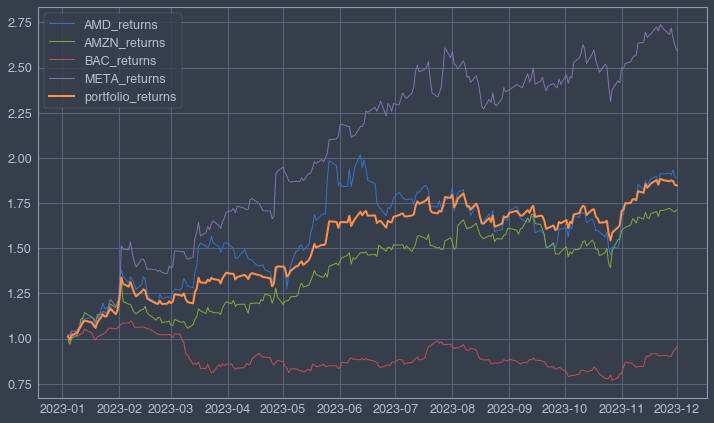

In [58]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('PORTFOLIO VISUALIZER', color='w', fontsize=20)

patches, texts, autotexts = ax.pie(total, labels=tickers, autopct="%1.1f%%", pctdistance=0.8);

[text.set_color('w') for text in texts]
[autotext.set_color('#373E4B') for autotext in autotexts]
[autotext.set_fontsize(14) for autotext in autotexts]

my_circle = plt.Circle((0, 0), 0.55, color='#373E4B')
plt.gca().add_artist(my_circle)

ax.text(-2, 1, 'PORTFOLIO OVERVIEW', fontsize=14,
                                     color='#ffe536',
                                     verticalalignment='center',
                                     horizontalalignment='center')

ax.text(-2, 0.85, f'Total USD Amount: ${sum(total):.2f}',
                                        fontsize=12, color='w',
                                        verticalalignment='center',
                                        horizontalalignment='center')

counter = 0.15
for ticker in tickers:
    ax.text(-2, 0.85-counter, f'{ticker}: ${total[tickers.index(ticker)]: .2f}',
                              fontsize=12, color='w',
                              verticalalignment='center',
                              horizontalalignment='center')
    counter += 0.15

fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()

In [41]:
prices

,AMD,AMZN,BAC,META
Date,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998
2023-01-04,64.660004,85.139999,33.109104,127.370003
2023-01-05,62.330002,83.120003,33.041222,126.940002
2023-01-06,63.959999,86.080002,33.370953,130.020004
2023-01-09,67.239998,87.360001,32.866653,129.470001
...,...,...,...,...
2023-11-27,122.650002,147.729996,29.325937,334.700012
2023-11-28,122.010002,147.029999,29.296177,338.989990
2023-11-29,123.849998,146.320007,30.070000,332.200012


In [50]:
prices['portfolio'] = 0
prices

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,AMD,AMZN,BAC,META,portfolio
Date,,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998,0
2023-01-04,64.660004,85.139999,33.109100,127.370003,0
2023-01-05,62.330002,83.120003,33.041222,126.940002,0
2023-01-06,63.959999,86.080002,33.370953,130.020004,0
2023-01-09,67.239998,87.360001,32.866650,129.470001,0
...,...,...,...,...,...
2023-11-27,122.650002,147.729996,29.325937,334.700012,0
2023-11-28,122.010002,147.029999,29.296177,338.989990,0
2023-11-29,123.849998,146.320007,30.070000,332.200012,0


In [51]:
for i in portfolio.keys():
    prices['portfolio'] += prices[i]*portfolio[i]['amount']

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [53]:
for t in prices.columns:
    prices[f'{t}_returns'] = np.log(prices[t].div(prices[t].shift(1)))

prices

f:\python\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,AMD,AMZN,BAC,META,portfolio,AMD_returns,AMZN_returns,BAC_returns,META_returns,portfolio_returns
Date,,,,,,,,,,
2023-01-03,64.019997,85.820000,32.498127,124.739998,4360.943718,NaN,NaN,NaN,NaN,NaN
2023-01-04,64.660004,85.139999,33.109100,127.370003,4411.573105,0.009947,-0.007955,0.018626,0.020865,0.011543
2023-01-05,62.330002,83.120003,33.041222,126.940002,4338.436737,-0.036700,-0.024012,-0.002052,-0.003382,-0.016717
2023-01-06,63.959999,86.080002,33.370953,130.020004,4441.328621,0.025815,0.034992,0.009930,0.023974,0.023439
2023-01-09,67.239998,87.360001,32.866650,129.470001,4499.099464,0.050010,0.014760,-0.015227,-0.004239,0.012924
...,...,...,...,...,...,...,...,...,...,...
2023-11-27,122.650002,147.729996,29.325937,334.700012,8157.078228,0.002776,0.006724,-0.005735,-0.010492,-0.002896
2023-11-28,122.010002,147.029999,29.296177,338.989990,8179.285240,-0.005232,-0.004750,-0.001015,0.012736,0.002719
2023-11-29,123.849998,146.320007,30.070000,332.200012,8164.300156,0.014968,-0.004841,0.026071,-0.020233,-0.001834


In [54]:
prices.dropna(inplace=True)

f:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


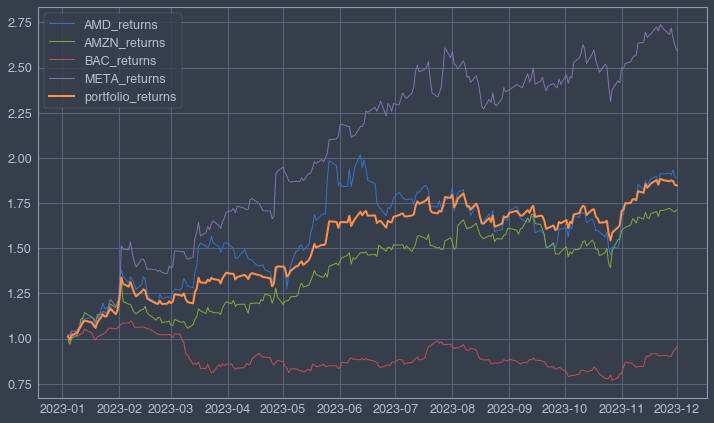

In [57]:
fig, ax = plt.subplots()
for t in prices.columns:
    if 'returns' in t:
        line_width = 1
        if t == 'portfolio_returns':
            line_width = 2
        ax.plot(prices.index, prices[t].cumsum().apply(np.exp), linewidth=line_width, label=t)

plt.legend()